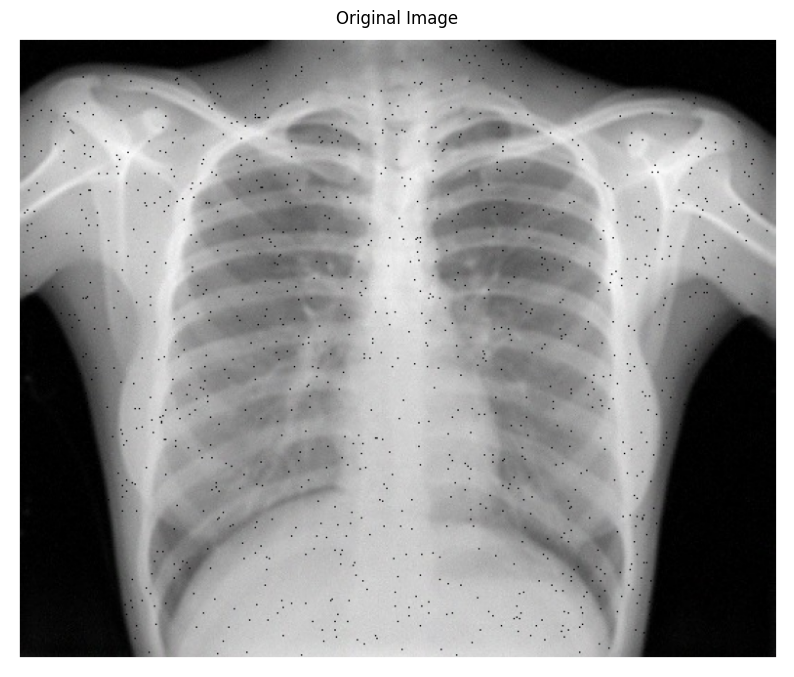

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Specify the image path (replace with your image path)
image_path = '/content/drive/MyDrive/chest1.png'

# Load the image
image = cv2.imread(image_path)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()





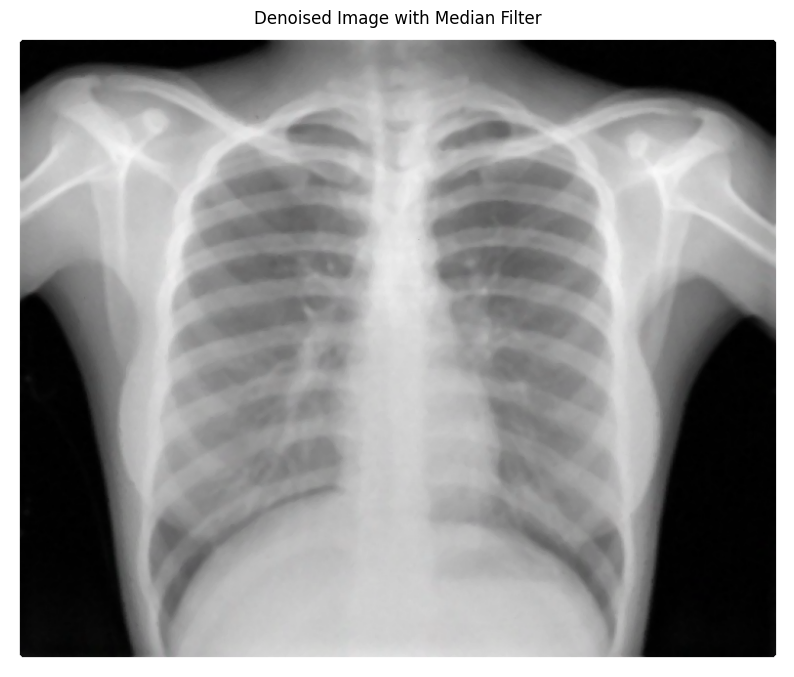

In [5]:
# Use median filtering to remove salt and pepper noise
denoised_image_median = cv2.medianBlur(image, ksize=5)

# Display the denoised image after median filtering
plt.figure(figsize=(10, 10))
plt.title("Denoised Image with Median Filter")
plt.imshow(denoised_image_median)
plt.axis('off')
plt.show()



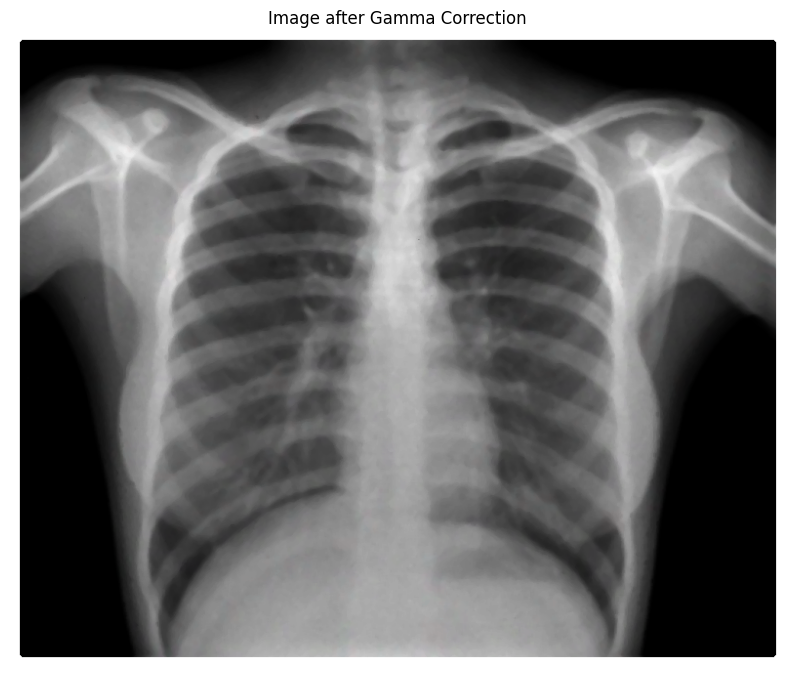

In [6]:
# Method: Apply gamma correction
gamma_value = 2.0  # Adjust the gamma value as needed
gamma_trans = np.array(255 * (denoised_image_median / 255) ** gamma_value, dtype=np.uint8)

# Display the image after gamma correction
plt.figure(figsize=(10, 10))
plt.title("Image after Gamma Correction")
plt.imshow(gamma_trans)
plt.axis('off')
plt.show()


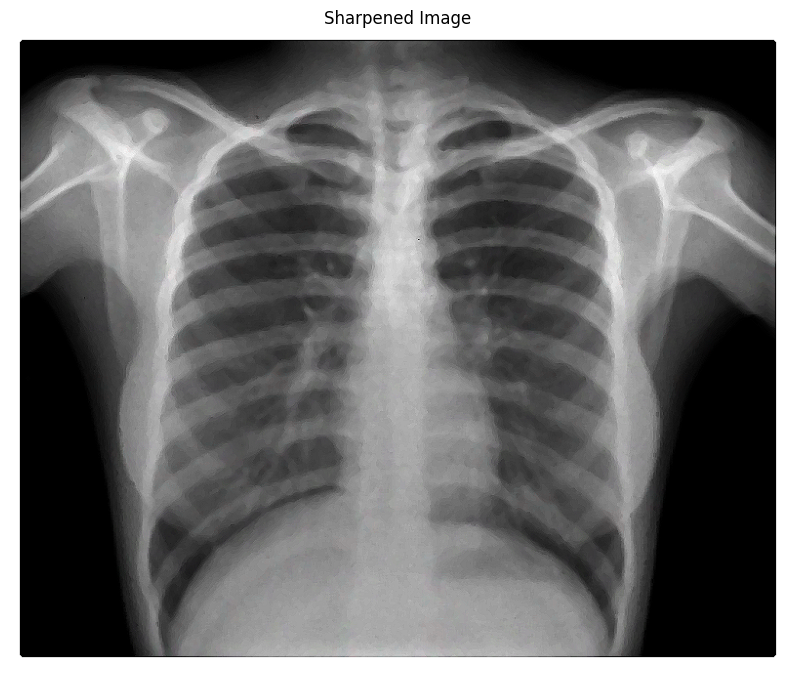

In [7]:
# Normalize the image
normalized_img = cv2.normalize(gamma_trans.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

# Compute the Laplacian filter
laplacian = cv2.Laplacian(normalized_img, cv2.CV_64F)

# Sharpen the image
sharpened = normalized_img - laplacian
sharpened = np.clip(sharpened * 255, 0, 255).astype(np.uint8)  # Convert back to uint8

# Display the sharpened image
plt.figure(figsize=(10, 10))
plt.title("Sharpened Image")
plt.imshow(sharpened)
plt.axis('off')
plt.show()


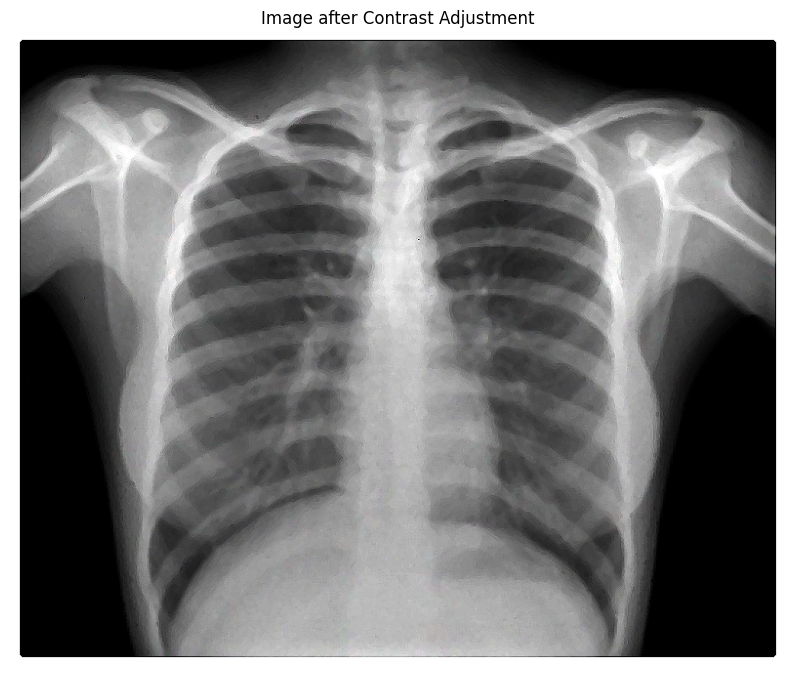

In [8]:
# Method: Adjust contrast
alpha = 1.1  # Contrast control (>1 increases contrast, <1 decreases contrast)
beta = 0     # Brightness control

# Use weighted sum to adjust contrast and brightness
img_adj = cv2.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# Display the image after contrast adjustment
plt.figure(figsize=(10, 10))
plt.title("Image after Contrast Adjustment")
plt.imshow(img_adj)
plt.axis('off')
plt.show()


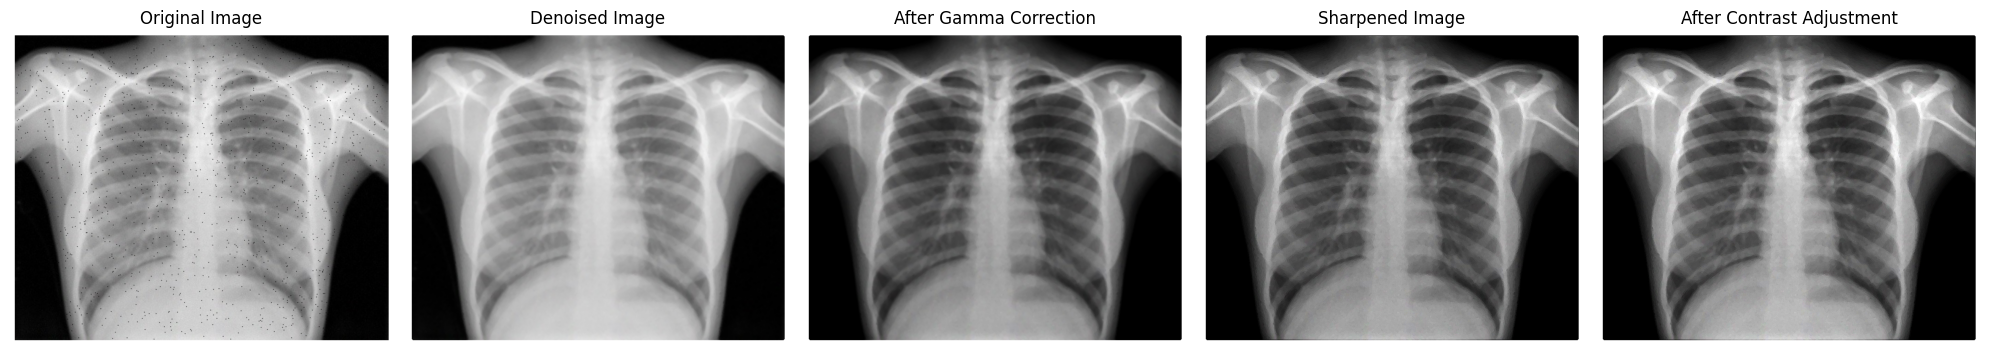

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Specify the image path (replace with your image path)
image_path = '/content/drive/MyDrive/chest1.png'

# Load the image
image = cv2.imread(image_path)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use median filtering to remove salt and pepper noise
denoised_image_median = cv2.medianBlur(image_rgb, ksize=5)

# Method: Apply gamma correction
gamma_value = 2.0  # Adjust the gamma value as needed
gamma_trans = np.array(255 * (denoised_image_median / 255) ** gamma_value, dtype=np.uint8)

# Normalize the image
normalized_img = cv2.normalize(gamma_trans.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

# Compute the Laplacian filter
laplacian = cv2.Laplacian(normalized_img, cv2.CV_64F)

# Sharpen the image
sharpened = normalized_img - laplacian
sharpened = np.clip(sharpened * 255, 0, 255).astype(np.uint8)  # Convert back to uint8

# Method: Adjust contrast
alpha = 1.1  # Contrast control (>1 increases contrast, <1 decreases contrast)
beta = 0     # Brightness control

# Use weighted sum to adjust contrast and brightness
img_adj = cv2.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# Create a figure to display all images side by side
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Denoised Image
plt.subplot(1, 5, 2)
plt.imshow(denoised_image_median)
plt.title("Denoised Image")
plt.axis('off')

# Image after Gamma Correction
plt.subplot(1, 5, 3)
plt.imshow(gamma_trans)
plt.title("After Gamma Correction")
plt.axis('off')

# Sharpened Image
plt.subplot(1, 5, 4)
plt.imshow(sharpened)
plt.title("Sharpened Image")
plt.axis('off')

# Image after Contrast Adjustment
plt.subplot(1, 5, 5)
plt.imshow(img_adj)
plt.title("After Contrast Adjustment")
plt.axis('off')

# Show all images
plt.tight_layout()
plt.show()
